# Laboratory 03: Markovian Decision Process (MDP)

Step 01: Settings for MDP

In [1]:
import sys, os, mdp 

# transition of probabilities
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}

# rewards
rewards = {
    's1': {'a0': {'s0': 5}},
    's2': {'a1': {'s0': -1}}
}


In [2]:
from mdp import MDP

# define graph of markovian decision process
net = MDP(transition_probs, rewards, initial_state = 's0')

# check the initial state
print("Initial state = ", net.reset())

next_state, reward, done, info = net.step('a1')
print(f"Next_state = {next_state}")
print(f"Reward = {reward}")
print(f"Done = {done}")

Initial state =  s0
Next_state = s2
Reward = 0.0
Done = False


In [5]:
# check MDP functionalities and outputs

print(" --- MDP functionalities ---")
print("All states S = ", net.get_all_states())
print("Possible actions for s1 = ", net.get_possible_actions('s1'))
print("Get next state for s1 taking action a0 = ", net.get_next_states('s1', 'a0'))
print("Get reward for transition between state s1 to s0 taking action a0 = ", 
        net.get_reward('s1', 'a0', 's0'))
print("Get transition of probability between state s1 to s0 taking action a0 = ",
        net.get_transition_prob('s1', 'a0', 's0'))


 --- MDP functionalities ---
All states S =  ('s0', 's1', 's2')
Possible actions for s1 =  ('a0', 'a1')
Get next state for s1 taking action a0 =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
Get reward for transition between state s1 to s0 taking action a0 =  5
Get transition of probability between state s1 to s0 taking action a0 =  0.7


Step 02: Graph visualization of MDP

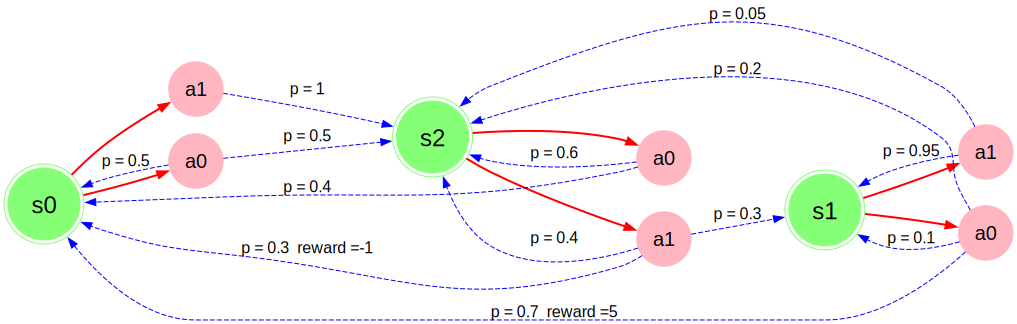

In [4]:
# graphic visualization 

from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, \
                    plot_graph_optimal_strategy_and_state_values
    display(plot_graph(net))


Step 03: Algorithm of Value Iterations (VI)  
  
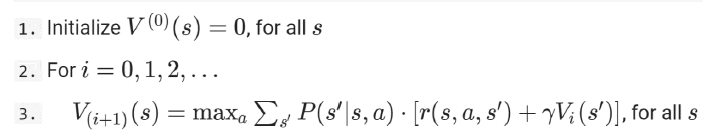

Compute function action-value Qi(s,a):  
  
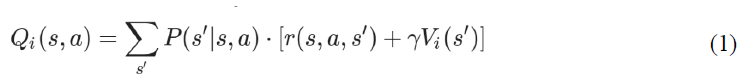

In [16]:
# calculate Q(s,a) using the next formula:
# Qi(s,a) = sum{s'}{P(s'|s,a) * [r(s,a,s') + gamma * Vi(s')]}

import numpy as np 

def get_action_value(net, state_values, state, action, gamma):
    Qi = 0
    for next_state in net.get_next_states(state, action):
        p = net.get_transition_prob(state, action, next_state)
        r = net.get_reward(state, action, next_state)
        Qi += p * (r + gamma * state_values[next_state])
    return Qi

In [17]:
# define state-values
test_Vs = {s: i for i, s in enumerate(sorted(net.get_all_states()))}
print(test_Vs)

{'s0': 0, 's1': 1, 's2': 2}


In [19]:
# test 01 - for function action-value
print(get_action_value(net, test_Vs, 's2', 'a1', 0.9))
assert np.isclose(get_action_value(net, test_Vs, 's2', 'a1', 0.9), 0.69)

0.6900000000000002


In [21]:
# test 02 - for function action-value
print(get_action_value(net, test_Vs, 's1', 'a0', 0.9))
assert np.isclose(get_action_value(net, test_Vs, 's1', 'a0', 0.9), 3.95)

3.9499999999999997


Calculate next Value-iteration using Q-value  
  
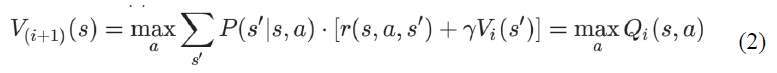

In [22]:
# calculate next_VI(s) = max Qi(s, a)
def get_new_state_value(net, state_values, state, gamma) -> float:
    if net.is_terminal(state):
        return 0
    # take the possible actions for state
    set_actions = net.get_possible_actions(state)
    next_VI = 0
    for action in set_actions:
        Qi = 0
        Qi = get_action_value(net, state_values, state, action, gamma)
        if Qi > next_VI:
            next_VI = Qi
    return next_VI


{'s0': 0, 's1': 0, 's2': 0}


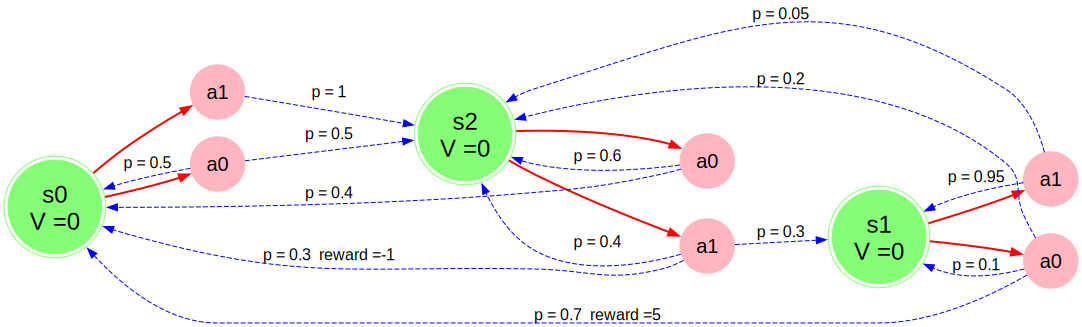

In [24]:
# initialization of markov chain settings

# parameters
gamma = 0.9
num_iter = 100

# convergence criteria
min_difference = 0.001

# initialization 
state_values = {s:0 for s in net.get_all_states()}
print(state_values)

# graphic of markov chain
if has_graphviz:
    display(plot_graph_with_state_values(net, state_values))


In [26]:
#               --- value-iteration algorithm ---

# VI-algorithm
for i in range(num_iter):
    # calculate next_VI(s) for all states
    new_state_values = {state: get_new_state_value(net, state_values, state, gamma) for state in net.get_all_states()}
    # check if the datatype is dictionary
    assert isinstance(new_state_values, dict)
    # calculate the divergence
    diff = max(abs(new_state_values[s] - state_values[s]) for s in net.get_all_states())
    print("iter %4i | diff: %6.5f | " % (i, diff), end="")
    print(' '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values
    if diff < min_difference:
        print("Terminated")
        break

iter    0 | diff: 3.50000 | V(s0) = 0.000 V(s1) = 0.000 V(s2) = 0.000
iter    1 | diff: 0.64500 | V(s0) = 0.000 V(s1) = 3.500 V(s2) = 0.000
iter    2 | diff: 0.58050 | V(s0) = 0.000 V(s1) = 3.815 V(s2) = 0.645
iter    3 | diff: 0.43582 | V(s0) = 0.581 V(s1) = 3.959 V(s2) = 0.962
iter    4 | diff: 0.30634 | V(s0) = 0.866 V(s1) = 4.395 V(s2) = 1.272
iter    5 | diff: 0.27571 | V(s0) = 1.145 V(s1) = 4.670 V(s2) = 1.579
iter    6 | diff: 0.24347 | V(s0) = 1.421 V(s1) = 4.926 V(s2) = 1.838
iter    7 | diff: 0.21419 | V(s0) = 1.655 V(s1) = 5.169 V(s2) = 2.075
iter    8 | diff: 0.19277 | V(s0) = 1.868 V(s1) = 5.381 V(s2) = 2.290
iter    9 | diff: 0.17327 | V(s0) = 2.061 V(s1) = 5.573 V(s2) = 2.481
iter   10 | diff: 0.15569 | V(s0) = 2.233 V(s1) = 5.746 V(s2) = 2.654
iter   11 | diff: 0.14012 | V(s0) = 2.389 V(s1) = 5.902 V(s2) = 2.810
iter   12 | diff: 0.12610 | V(s0) = 2.529 V(s1) = 6.042 V(s2) = 2.950
iter   13 | diff: 0.11348 | V(s0) = 2.655 V(s1) = 6.168 V(s2) = 3.076
iter   14 | diff: 0.

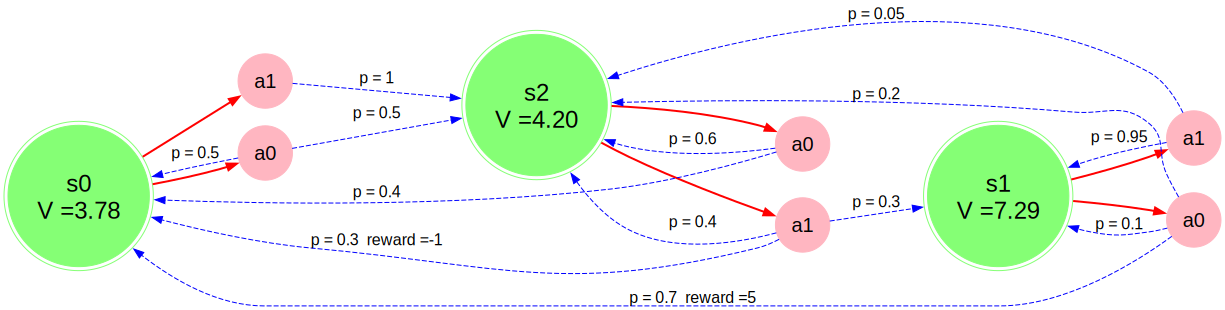

In [27]:
# check the results of state-values in markov chain
if has_graphviz:
    display(plot_graph_with_state_values(net, state_values))

In [29]:
print("Final state-values = ", state_values)
assert abs(state_values['s0'] - 3.781) < 0.01
assert abs(state_values['s1'] - 7.294) < 0.01
assert abs(state_values['s2'] - 4.202) < 0.01

Final state-values =  {'s0': 3.7810348735476405, 's1': 7.294006423867229, 's2': 4.202140275227048}


Step 04: Algorithm of Optimal actions Pi*  
Using VI* (optimal value-iteration), find optimal actions for each state Pi*  
   
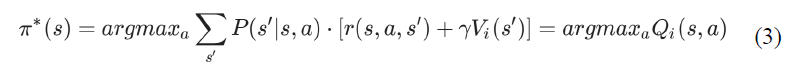

In [41]:
# take the action corresponded to argmax taking in account the formula:
# pi*(s) = argmax_{a}{(Q(s, a))} 
def get_optimal_action(net, state_values, state, gamma=0.9):
    if net.is_terminal(state):
        return None
    # take the set of actions
    set_actions = net.get_possible_actions(state)

    # check by each action, the argmax of Qi
    vect_action_values = []
    for action in set_actions:
        Q_value = get_action_value(net, state_values, state, action, gamma)
        vect_action_values.append(Q_value)
    
    # take the argmax of vect_action_values
    pi_index = np.argmax(vect_action_values)
    pi_star = set_actions[pi_index]

    return pi_star


In [50]:
# final results
print("Final state-values V(s) = ", state_values)
assert(get_optimal_action(net, state_values, 's0', gamma) == 'a1')
assert(get_optimal_action(net, state_values, 's1', gamma) == 'a0')
assert(get_optimal_action(net, state_values, 's2', gamma) == 'a1')

Final state-values V(s) =  {'s0': 3.7810348735476405, 's1': 7.294006423867229, 's2': 4.202140275227048}


In [51]:
# test 01 - optimal action pi*
print(get_optimal_action(net, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9))
assert(get_optimal_action(net, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9) == 'a0')

a0


In [52]:
# test 02 - optimal action pi*
print(get_optimal_action(net, {'s0': -2e10, 's1': 0, 's2': -1e10}, 's0', 0.9))
assert(get_optimal_action(net, {'s0': -2e10, 's1': 0, 's2': -1e10}, 's0', 0.9) == 'a1')

a1


Step 05: Calculate average reward

In [53]:
s = net.reset()
rewards = []

# iterate and calculate the math-expectation of reward
for _ in range(10000):
    s, r, done, _ = net.step(get_optimal_action(net, state_values, s, gamma))
    rewards.append(r)

# check the final results of average reward
print("Average reward = ", np.mean(rewards))
assert(0.40 < np.mean(rewards) < 0.55)

Average reward =  0.4575
